# Effect of Loan Variables on Loan Amount
## by Isiaq Adebayo Okeyode

## Investigation Overview

> In this analysis, I'm assuming the role of a Borrower. I want to find out what variable come into play to determine the maximum Loan Amount to be given out to a Borrower? The main focus was StatedMonthlyIncome, DebtToIncomeRatio, Loan Term and ProsperScore.

## Dataset Overview

> The data consists of Loan Original Amount and other variables of approximately 114,000 rows of loan data and 20 columns. A subset of the data was used for the analysis. The features included StatedMonthlyIncome, DebtToIncomeRatio, Loan Term, ProsperScore as well as some additional variables. Some data points were removed due to missing information and inconsistencies.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
new_prsper = pd.read_csv('LoanData.csv')
new_prsper.head(5)

,ListingNumber,Term,LoanStatus,IncomeRange,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,DebtToIncomeRatio,IsBorrowerHomeowner,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationQuarter,MonthlyLoanPayment,LoanOriginationYear,LoanOriginationMonth,LoanOriginationTime
0,1209647,36,Current,"$50,000-74,999",A,7,2,CO,Professional,Employed,44.0,0.18,Not Home Owner,6125.0,10000,Q1 2014,318.93,2014,March,00:00:00
1,658116,36,Current,"$25,000-49,999",A,9,16,GA,Skilled Labor,Employed,113.0,0.15,Home Owner,2875.0,10000,Q4 2012,321.45,2012,November,00:00:00
2,909464,36,Current,"$100,000+",D,4,2,MN,Executive,Employed,44.0,0.26,Home Owner,9583.0,15000,Q3 2013,563.97,2013,September,00:00:00
3,1074836,60,Current,"$100,000+",B,10,1,NM,Professional,Employed,82.0,0.36,Home Owner,8333.0,15000,Q4 2013,342.37,2013,December,00:00:00
4,750899,36,Current,"$25,000-49,999",E,2,1,KS,Sales - Retail,Employed,172.0,0.27,Not Home Owner,2083.0,3000,Q2 2013,122.67,2013,April,00:00:00


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Loan Amount Distribution

> The peak values are at around 5,000, 10,000, 15,000, 20,000, 25,000 and 35,000 (in USD). It means that loans are given out in rounded figures and in multiples of 5,000. I observe that majority of loans are given out at 4,000 , 10,000 and 15,000.

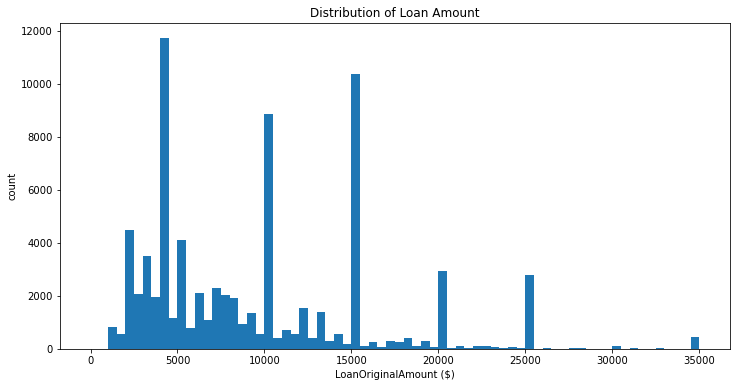

In [3]:
binsize = 500
bins = np.arange(0, new_prsper['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[12, 6])
plt.hist(data = new_prsper, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('LoanOriginalAmount ($)')
plt.ylabel('count')
plt.title('Distribution of Loan Amount');
plt.show()

## Distribution of Income Ranges

> People with income ranges of 25,000 to 75,000 (USD) gets the most loan while people with no income gets nothing.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '$50,000-74,999'),
  Text(1, 0, '$25,000-49,999'),
  Text(2, 0, '$100,000+'),
  Text(3, 0, '$75,000-99,999'),
  Text(4, 0, '$1-24,999'),
  Text(5, 0, 'Not employed')])

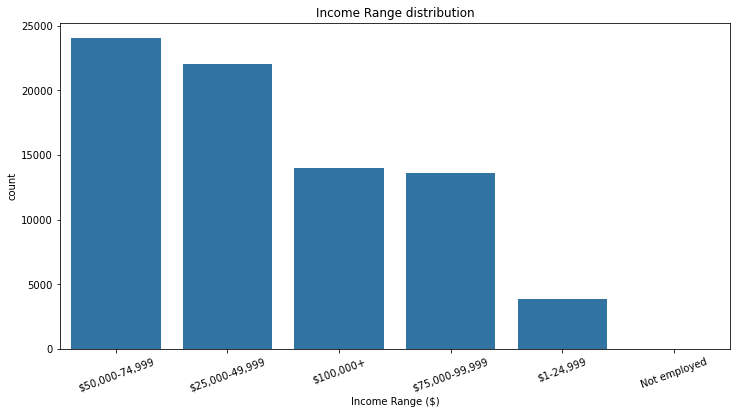

In [4]:
#Selecting one color from seaborn's color palette
base_color = sns.color_palette()[0]

plt.figure(figsize=[12, 6])
sns.countplot(new_prsper.IncomeRange, color=base_color)
plt.title('Income Range distribution')
plt.xlabel('Income Range ($)')
plt.xticks(rotation=20)

## Distribution of Debt to Income Ratio
> Even though most Lenders prefer a Debt-To-Income-Ratio thats (36%) or leser. But depending on the loan type 50% is a threshold value.

> As seen on the plot above, large spikes in frequency are observed around 0.2 and 0.36. This implies that majority of borrowers have a Debt-To-Income Ratio below the threshhold value.

Text(0.5, 1.0, 'Distribution of Debt-To-Income-Ratio')

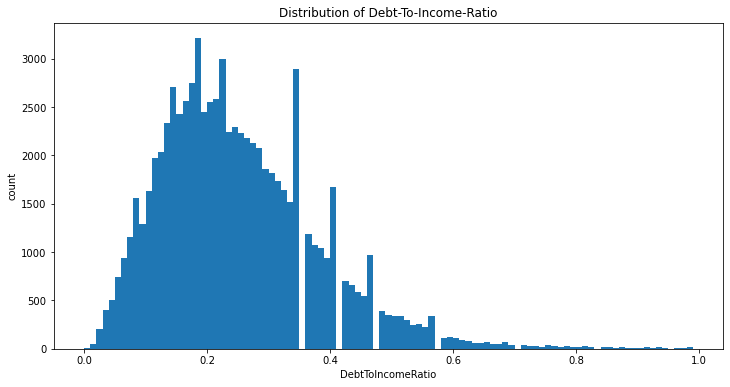

In [5]:
bins = np.arange(0,1, 0.01)

plt.figure(figsize=[12, 6])
plt.hist(data = new_prsper, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('count')
plt.title('Distribution of Debt-To-Income-Ratio')

## Distribution of Loan Term
> It is observed that majority of the loan is termed at 36 months (3 years)

Text(0.5, 1.0, 'Loan Term Occurence')

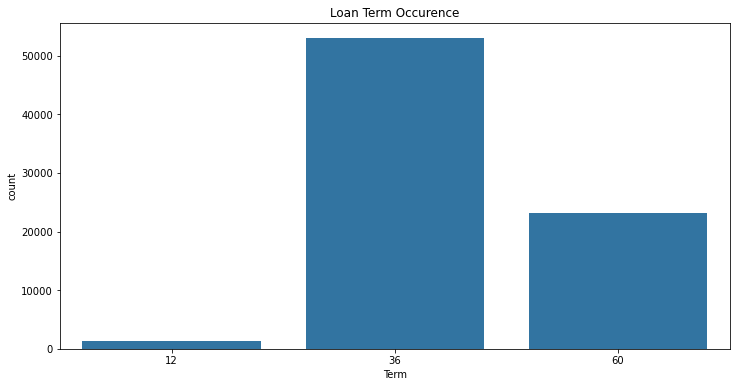

In [6]:
plt.figure(figsize=[12, 6])
sns.countplot(data = new_prsper, x='Term', color=base_color)
plt.title('Loan Term Occurence')

## Distribution of Monthly Loan Payment
> The large number of loaners put the monthly loan payment at approximately 200 dollars. Majority of the monthly loan payment is below 500 dollars.

Text(0.5, 1.0, 'Distribution of Monthly Loan Payment')

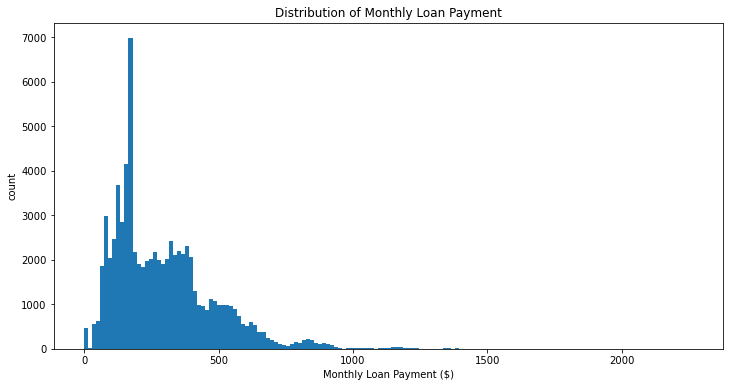

In [7]:
binsize = 15
bins = np.arange(0, new_prsper['MonthlyLoanPayment'].max()+binsize, binsize)

plt.figure(figsize=[12, 6])
plt.hist(data = new_prsper, x='MonthlyLoanPayment', bins=bins)
plt.xlabel('Monthly Loan Payment ($)')
plt.ylabel('count')
plt.title('Distribution of Monthly Loan Payment')

## Distribution of the Year Loan is given most
> Most of the Loans given were generally made in the year 2013 and it dropped in 2014.

<AxesSubplot:xlabel='LoanOriginationYear', ylabel='count'>

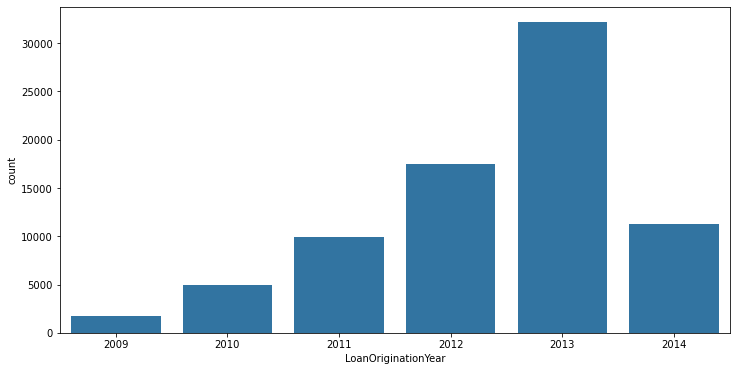

In [8]:
plt.figure(figsize=[12, 6])
sns.countplot(data = new_prsper, x = 'LoanOriginationYear', color = base_color)

## Distribution of Employment Status
> Most borrower's are gainfully employed or working full time

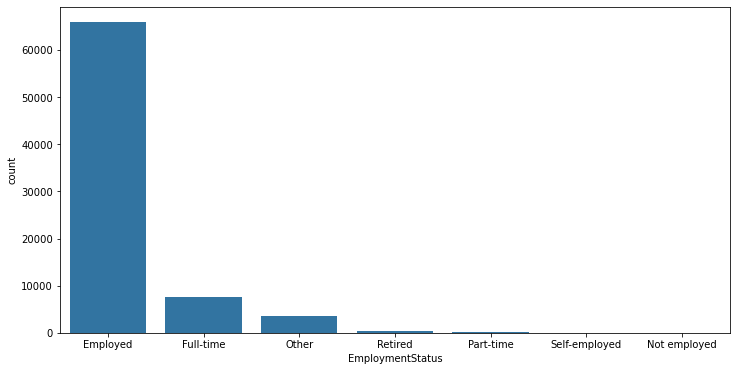

In [9]:
plt.figure(figsize=[12, 6])
sns.countplot(data = new_prsper, x = 'EmploymentStatus', order = new_prsper['EmploymentStatus'].value_counts().index,
             color = base_color)
plt.show()

## Are they Home Owners?
> 60% of the borrower's are home owners

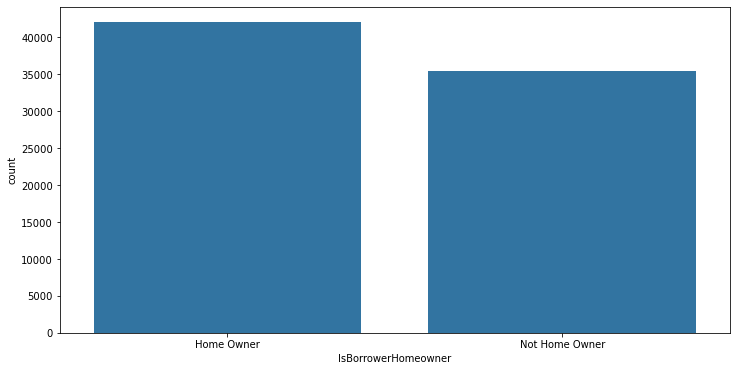

In [10]:
plt.figure(figsize = [12, 6])

sns.countplot(data = new_prsper, x = 'IsBorrowerHomeowner', order = new_prsper['IsBorrowerHomeowner'].value_counts().index, 
             color = base_color)

plt.show()

## Distribution of DebtToIncomeRatio and Loan Amount
> When a borrower has relatively low Monthly Income (<8,000) the probabilities of getting low and high Loan Amount are smaller. However, when the borrower’s Monthly Income is high (>8,000), he/she is more likely to get a High Loan Amount.

Text(0.5, 1.0, 'Loan Original Amount ($) by Debt to Income Ratio')

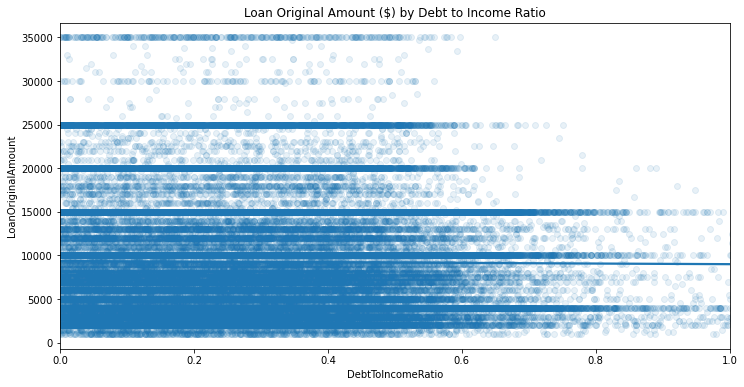

In [11]:
plt.figure(figsize=[12, 6])
sns.regplot(data = new_prsper, x='DebtToIncomeRatio', y='LoanOriginalAmount', x_jitter=0.3, scatter_kws=({'alpha':1/10}))
plt.xlim(0,1)
plt.title('Loan Original Amount ($) by Debt to Income Ratio')

## Distribution of Home Owner and a good risk score on the Loan Amount
> The plot shows that home owners with a good ProsperScore(low risk) is likely to get a Large Loan Amount.

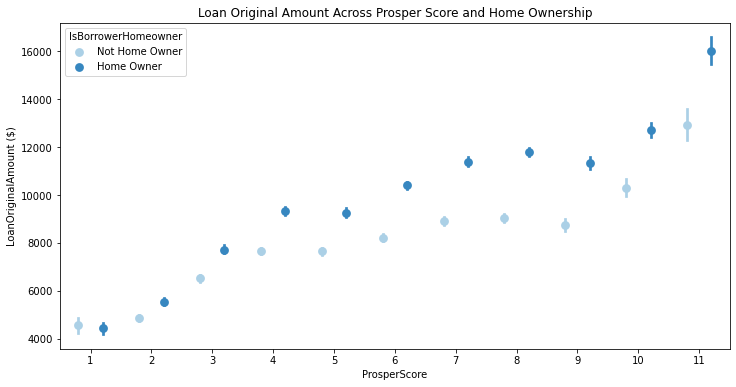

In [12]:
fig = plt.figure(figsize = [12, 6])
ax = sns.pointplot(data = new_prsper, x = 'ProsperScore', y = 'LoanOriginalAmount', hue = 'IsBorrowerHomeowner',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Loan Original Amount Across Prosper Score and Home Ownership')
plt.ylabel('LoanOriginalAmount ($)')
plt.xlabel('ProsperScore')

plt.show()

## Correlation between Loan Amount and Stated Monthly income, and Loan Term
> The plot shows that borrower's with longer Loan Term 36, 60 months receives higher Loan amount. For a maximum Loan Amount of 35,000 the Loan Term is longer,(36 or 60 months)

> I also observed that for a longer Loan Term the scheduled monthly payment is less than that of small term (12months).

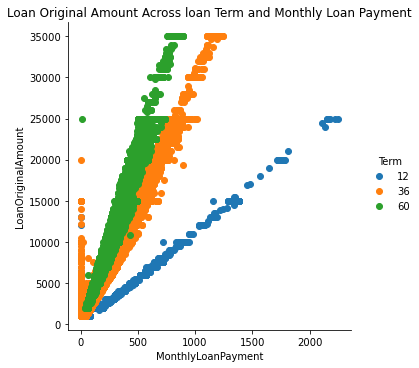

In [13]:
g = sns.FacetGrid(data = new_prsper, hue = 'Term', size = 5,)
g.map(plt.scatter, 'MonthlyLoanPayment', 'LoanOriginalAmount')
plt.title('Loan Original Amount Across loan Term and Monthly Loan Payment')
g.add_legend()

## Loan Term and Prosper score effects on the Loan Amount
> The plot shows that if the Loan Term (in months) is higher (e.g 60 months) and the Prosper Score is high (i.e. less risk), the borrower is more likely to get a large Loan Amount.

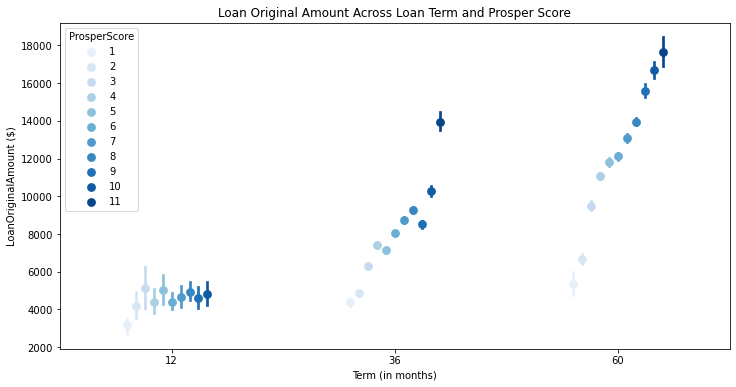

In [14]:
fig = plt.figure(figsize = [12, 6])
ax = sns.pointplot(data = new_prsper, x = 'Term', y = 'LoanOriginalAmount', hue = 'ProsperScore',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Loan Original Amount Across Loan Term and Prosper Score')
plt.ylabel('LoanOriginalAmount ($)')
plt.xlabel('Term (in months)')
plt.show()

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt